In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
import operator


In [2]:
from nsepy import get_history
from datetime import date 
from datetime import datetime, timedelta

# All analysis is done on top 100 bigest company in term of market cap

In [6]:
comp_name = pd.read_csv('comp_name.csv')
comp_name

,Sr. No.,Symbol,Company Name,market_cap
0,1,RELIANCE,Reliance Industries Limited,70603579.0
1,2,TCS,Tata Consultancy Services Limited,68522297.0
2,3,HINDUNILVR,Hindustan Unilever Limited,49758412.0
3,4,HDFCBANK,HDFC Bank Limited,47248232.0
4,5,HDFC,Housing Development Finance Corporation Limited,28235708.0
...,...,...,...,...
92,96,GLAXO,GlaxoSmithKline Pharmaceuticals Limited,2130111.0
93,97,3MINDIA,3M India Limited,2120982.0
94,98,PEL,Piramal Enterprises Limited,2119007.0
95,99,KANSAINER,Kansai Nerolac Paints Limited,2088044.0


In [7]:
df = comp_name["Symbol"].head(500)
df 

0       RELIANCE
1            TCS
2     HINDUNILVR
3       HDFCBANK
4           HDFC
         ...    
92         GLAXO
93       3MINDIA
94           PEL
95     KANSAINER
96    ADANITRANS
Name: Symbol, Length: 97, dtype: object

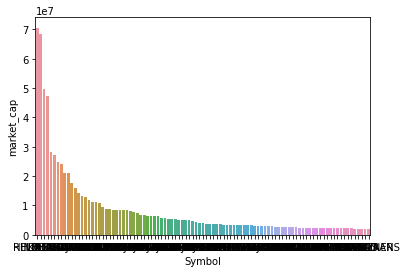

In [8]:
ax = sns.barplot(x="Symbol", y="market_cap", data=comp_name)

In [ ]:
sns.scatterplot(data=comp_name, x="Symbol", y="market_cap")

# Top 5 company in term of market cap

In [ ]:
df.head(5)

# Profit and loss %

In [ ]:
profit = {}


In [ ]:
for i in df:
    df1 =  get_history(symbol= i ,  start=datetime.today() - timedelta(365), end=datetime.today())
    high = df1['High'].max()
    low = df1['Low'].min()
    vwap_avg = df1['VWAP'].mean()
    vwap0 = df1.iloc[-1].at['VWAP']
    p = (vwap0- vwap_avg)*100/vwap0
    profit[i]=p

In [ ]:
profit = dict( sorted(profit.items(),
                           key=lambda item: item[1],
                           reverse=True))
profit

these show profit % in one year in term vwap avg and vwap for today 


# Top 5 Gainer company (1yr duration)

In [ ]:
import itertools 

In [ ]:
top_gainer = dict(itertools.islice(profit.items(), 5)) 

In [ ]:
top_gainer

In [ ]:
for i in top_gainer.keys():
    data_g = get_history(symbol=i ,  start=datetime.today() - timedelta(365), end=datetime.today())
    data_g[['Open']].plot()
    

These are top 5 gainer company in term of volume weighted average

# Top 5 looser company (1yr duration)

In [ ]:
# top_looser = dict(itertools.islice(profit.items(), 5)) 
top_looser = list(profit.keys())
top_looser = top_looser[-5:]
top_looser

In [ ]:
for i in top_looser:
    data_l = get_history(symbol=i ,  start=datetime.today() - timedelta(365), end=datetime.today())
    data_l[['Open']].plot()
    

# Three company in which you should invest


In [ ]:
df_3 = df.head(50)


In [ ]:
list_i = []
for i in df_3:
    df1 =  get_history(symbol= i ,  start=datetime.today() - timedelta(365), end=datetime.today())
    high = df1['High'].max()
    low = df1['Low'].min()
    vwap_avg = df1['VWAP'].mean()
    vwap0 = df1.iloc[-1].at['VWAP']
    p = (vwap0- vwap_avg)*100/vwap0
    profit[i]=p
    if p>=3:
        l = (high-vwap0)*100/high
        if l>=15:
            list_i.append(i)
    

In [ ]:

list_i